Midterm project: Equity Portfolio Management

Data Preparation

Download the historial daily data of the entire 2018 for the 10 stocks 
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 9 stocks.

You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe" which is the entire stock market you can trade.

Retrieve the "Close" and "Adj Close" values for each stock:
You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.


You start to manage 5 million dollars fund on Jan 02, 2018
You have a strategy to manage the fund.

1. On Jan 02 2018, you split the $5m into 5 $1m, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was $154.25. With $1m, you can buy max 6482 shares with cost $999848.5 with $151.5  cash left. You decided to spend $1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is $5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.   𝑀𝑇𝑀t =𝑐𝑎𝑠ℎ𝑡 + 5∑𝑘=1 𝑡𝑆ℎ𝑎𝑟𝑒𝑘 × 𝑡𝐶𝑙𝑜𝑠𝑒𝑃𝑟𝑖𝑐e𝑘

2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing". Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.

3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued $1.5 dividend per share. In your cash account, you will automatically get $1.5×(𝑦𝑜𝑢𝑟 𝐼𝐵𝑀 𝑠ℎ𝑎𝑟𝑒𝑠 𝑜𝑛 2/8/2018)

4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.

5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than $5m because you always buy the stocks that dropped the most, i.e., you always buy low.

6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.

7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.

8. Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data (https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data) then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.

9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018.

In [1]:
install.packages('fasttime')
install.packages("ggplot2")
install.packages("plotly")
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Importing Packages that are required for data cleaning and data manipulation

In [2]:
#Supress Warnings
options(warn=-1)
require(data.table)
library(dplyr)
library(lubridate)
library(tidyverse)
library(reshape2)

Loading required package: data.table


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::between()         masks data.table::between(

Importing Datasets of the stock

In [3]:
ibm <- read.csv("IBM.csv")
head(ibm)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,147.7056,148.0019,146.7878,147.4665,120.3419,4395815
2,2018-01-03,150.4207,152.7820,149.4551,151.5201,123.6499,9875914
3,2018-01-04,152.6291,155.1816,152.3614,154.5889,126.1543,7903785
4,2018-01-05,155.2964,155.7361,154.0153,155.3442,126.7706,5434807
5,2018-01-08,155.5067,156.7017,154.5889,156.2811,127.5351,5478425
6,2018-01-09,156.6922,157.2944,155.8891,156.6252,127.8160,4541523


In [4]:
msft <- read.csv("MSFT.csv")
head(msft)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,86.13,86.31,85.50,85.95,81.53024,22483800
2,2018-01-03,86.06,86.51,85.97,86.35,81.90965,26061400
3,2018-01-04,86.59,87.66,86.57,87.11,82.63058,21912000
4,2018-01-05,87.66,88.41,87.43,88.19,83.65506,23407100
5,2018-01-08,88.20,88.58,87.60,88.28,83.74043,22113000
6,2018-01-09,88.65,88.73,87.86,88.22,83.68350,19484300


In [5]:
goog <- read.csv("GOOG.csv")
head(goog)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,1048.34,1066.94,1045.230,1065.00,1065.00,1237600
2,2018-01-03,1064.31,1086.29,1063.210,1082.48,1082.48,1430200
3,2018-01-04,1088.00,1093.57,1084.002,1086.40,1086.40,1004600
4,2018-01-05,1094.00,1104.25,1092.000,1102.23,1102.23,1279100
5,2018-01-08,1102.23,1111.27,1101.620,1106.94,1106.94,1047600
6,2018-01-09,1109.40,1110.57,1101.231,1106.26,1106.26,902500


In [6]:
fb <- read.csv("FB.csv")
head(fb)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,177.68,181.58,177.55,181.42,181.42,18151900
2,2018-01-03,181.88,184.78,181.33,184.67,184.67,16886600
3,2018-01-04,184.90,186.21,184.10,184.33,184.33,13880900
4,2018-01-05,185.59,186.90,184.93,186.85,186.85,13574500
5,2018-01-08,187.20,188.90,186.33,188.28,188.28,17994700
6,2018-01-09,188.70,188.80,187.10,187.87,187.87,12393100


In [7]:
aapl <- read.csv("AAPL.csv")
head(aapl)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,42.5400,43.0750,42.3150,43.0650,41.13575,102223600
2,2018-01-03,43.1325,43.6375,42.9900,43.0575,41.12859,118071600
3,2018-01-04,43.1350,43.3675,43.0200,43.2575,41.31963,89738400
4,2018-01-05,43.3600,43.8425,43.2625,43.7500,41.79008,94640000
5,2018-01-08,43.5875,43.9025,43.4825,43.5875,41.63485,82271200
6,2018-01-09,43.6375,43.7650,43.3525,43.5825,41.63008,86336000


In [8]:
amzn <- read.csv("AMZN.csv")
head(amzn)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2694500
2,2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3108800
3,2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3022100
4,2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3544700
5,2018-01-08,1236.00,1253.08,1232.03,1246.87,1246.87,4279500
6,2018-01-09,1256.90,1259.33,1241.76,1252.70,1252.70,3661300


In [9]:
nflx <- read.csv("NFLX.csv")
head(nflx)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,196.10,201.65,195.42,201.07,201.07,10966900
2,2018-01-03,202.05,206.21,201.50,205.05,205.05,8591400
3,2018-01-04,206.20,207.05,204.00,205.63,205.63,6029600
4,2018-01-05,207.25,210.02,205.59,209.99,209.99,7033200
5,2018-01-08,210.02,212.50,208.44,212.05,212.05,5580200
6,2018-01-09,212.11,212.98,208.59,209.31,209.31,6125900


In [10]:
orcl <- read.csv("ORCL.csv")
head(orcl)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,47.57,47.80,46.17,46.63,43.50795,25380000
2,2018-01-03,47.53,48.07,47.44,47.71,44.51563,24165000
3,2018-01-04,47.99,48.19,47.72,48.18,44.95416,19815100
4,2018-01-05,48.42,48.63,48.28,48.47,45.22475,14496400
5,2018-01-08,48.30,49.07,47.94,48.98,45.70061,15075000
6,2018-01-09,49.25,49.36,48.92,49.06,45.95351,14153700


In [11]:
sap <- read.csv("SAP.csv")
head(sap)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,111.23,112.42,111.13,112.39,105.9143,540600
2,2018-01-03,112.63,113.69,112.55,113.31,106.7813,506200
3,2018-01-04,114.78,115.30,114.70,115.05,108.4210,539300
4,2018-01-05,115.45,116.50,115.36,116.33,109.6273,475300
5,2018-01-08,115.09,115.42,114.76,114.80,108.1854,515400
6,2018-01-09,114.36,114.46,113.45,114.16,107.5823,515900


In [13]:
tsla <- read.csv("TSLA.csv")
head(tsla)


,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2018-01-02,62.400,64.422,62.200,64.106,64.106,21761000
2,2018-01-03,64.200,65.050,63.110,63.450,63.450,22607500
3,2018-01-04,62.574,63.710,61.136,62.924,62.924,49731500
4,2018-01-05,63.324,63.448,62.400,63.316,63.316,22956000
5,2018-01-08,63.200,67.404,63.100,67.282,67.282,49297000
6,2018-01-09,67.032,67.760,65.480,66.738,66.738,35733000


creating the dataframe universe which contains the close and adj close attriutes from each data set

In [14]:
universe = data.frame(   Date=c(aapl$Date),
						 Apple_Close=c(aapl$Close),
						 Apple_AdjClose=(aapl$Adj.Close),
						 Amazon_Close=c(amzn$Close),
						 Amazon_AdjClose=c(amzn$Adj.Close),
						 FB_Close=c(fb$Close),
						 FB_AdjClose=c(fb$Adj.Close), 
						 Google_Close=c(goog$Close),
						 Google_AdjClose=c(goog$Adj.Close),
						 IBM_Close=c(ibm$Close),
						 IBM_AdjClose=c(ibm$Adj.Close), 
						 MSFT_Close=c(msft$Close),
						 MSFT_AdjClose=c(msft$Adj.Close), 
						 NFLX_Close=c(nflx$Close),
						 NFLX_AdjClose=c(nflx$Adj.Close),
						 ORCL_Close=c(orcl$Close),
						 ORCL_AdjClose=c(orcl$Adj.Close),                 
						 SAP_Close=c(sap$Close),
						 SAP_AdjClose=c(sap$Adj.Close), 
						 TSLA_Close=c(tsla$Close), 
						 TSLA_AdjClose=c(tsla$Adj.Close))

In [15]:
head(universe)

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,MSFT_Close,MSFT_AdjClose,NFLX_Close,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,43.0650,41.13575,1189.01,1189.01,181.42,181.42,1065.00,1065.00,147.4665,⋯,85.95,81.53024,201.07,201.07,46.63,43.50795,112.39,105.9143,64.106,64.106
2,2018-01-03,43.0575,41.12859,1204.20,1204.20,184.67,184.67,1082.48,1082.48,151.5201,⋯,86.35,81.90965,205.05,205.05,47.71,44.51563,113.31,106.7813,63.450,63.450
3,2018-01-04,43.2575,41.31963,1209.59,1209.59,184.33,184.33,1086.40,1086.40,154.5889,⋯,87.11,82.63058,205.63,205.63,48.18,44.95416,115.05,108.4210,62.924,62.924
4,2018-01-05,43.7500,41.79008,1229.14,1229.14,186.85,186.85,1102.23,1102.23,155.3442,⋯,88.19,83.65506,209.99,209.99,48.47,45.22475,116.33,109.6273,63.316,63.316
5,2018-01-08,43.5875,41.63485,1246.87,1246.87,188.28,188.28,1106.94,1106.94,156.2811,⋯,88.28,83.74043,212.05,212.05,48.98,45.70061,114.80,108.1854,67.282,67.282
6,2018-01-09,43.5825,41.63008,1252.70,1252.70,187.87,187.87,1106.26,1106.26,156.6252,⋯,88.22,83.68350,209.31,209.31,49.06,45.95351,114.16,107.5823,66.738,66.738


In [16]:
nrow(universe)
ncol(universe)

[1] 250

[1] 21

In [17]:
is.na(date)

[1] FALSE

In [18]:
?summary

creating a dataframe to input shares, bank balance and MTM

In [19]:
Market = universe[seq(1,nrow(universe)),]
head(Market)

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,MSFT_Close,MSFT_AdjClose,NFLX_Close,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,43.0650,41.13575,1189.01,1189.01,181.42,181.42,1065.00,1065.00,147.4665,⋯,85.95,81.53024,201.07,201.07,46.63,43.50795,112.39,105.9143,64.106,64.106
2,2018-01-03,43.0575,41.12859,1204.20,1204.20,184.67,184.67,1082.48,1082.48,151.5201,⋯,86.35,81.90965,205.05,205.05,47.71,44.51563,113.31,106.7813,63.450,63.450
3,2018-01-04,43.2575,41.31963,1209.59,1209.59,184.33,184.33,1086.40,1086.40,154.5889,⋯,87.11,82.63058,205.63,205.63,48.18,44.95416,115.05,108.4210,62.924,62.924
4,2018-01-05,43.7500,41.79008,1229.14,1229.14,186.85,186.85,1102.23,1102.23,155.3442,⋯,88.19,83.65506,209.99,209.99,48.47,45.22475,116.33,109.6273,63.316,63.316
5,2018-01-08,43.5875,41.63485,1246.87,1246.87,188.28,188.28,1106.94,1106.94,156.2811,⋯,88.28,83.74043,212.05,212.05,48.98,45.70061,114.80,108.1854,67.282,67.282
6,2018-01-09,43.5825,41.63008,1252.70,1252.70,187.87,187.87,1106.26,1106.26,156.6252,⋯,88.22,83.68350,209.31,209.31,49.06,45.95351,114.16,107.5823,66.738,66.738


splitting dataset for 5 working days to apply strategies


In [20]:
Gap5 = Market[seq(1,nrow(Market),5),]
Gap5$Date = as.Date(Gap5$Date)
head(Gap5) 

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,MSFT_Close,MSFT_AdjClose,NFLX_Close,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,43.0650,41.13575,1189.01,1189.01,181.42,181.42,1065.00,1065.00,147.4665,⋯,85.95,81.53024,201.07,201.07,46.63,43.50795,112.39,105.9143,64.106,64.106
6,2018-01-09,43.5825,41.63008,1252.70,1252.70,187.87,187.87,1106.26,1106.26,156.6252,⋯,88.22,83.68350,209.31,209.31,49.06,45.95351,114.16,107.5823,66.738,66.738
11,2018-01-17,44.7750,42.76915,1295.00,1295.00,177.60,177.60,1131.98,1131.98,161.2333,⋯,90.14,85.50478,217.50,217.50,50.27,47.08689,111.19,104.7834,69.432,69.432
16,2018-01-24,43.5550,41.60380,1357.51,1357.51,186.55,186.55,1164.24,1164.24,158.0975,⋯,91.82,87.09838,261.30,261.30,51.45,48.19217,114.37,107.7802,69.178,69.178
21,2018-01-31,41.8575,39.98235,1450.89,1450.89,186.89,186.89,1169.94,1169.94,156.5010,⋯,95.01,90.12435,270.30,270.30,51.59,48.32330,113.25,106.7247,70.862,70.862
26,2018-02-07,39.8850,38.09821,1416.78,1416.78,180.18,180.18,1048.58,1048.58,147.0841,⋯,89.61,85.00204,264.56,264.56,48.87,45.77553,105.09,99.0349,69.000,69.000


In [21]:
closeColn = Gap5[Gap5$Date=='2018-01-02',
                  c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')]


In [23]:
head(closeColn)

,IBM_Close,MSFT_Close,Google_Close,Amazon_Close,FB_Close
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,147.4665,85.95,1065,1189.01,181.42


No Dividends - 1st strategy

In [24]:
#Declaring all the necessay variables
investedAmount = 5000000
options(digits=9)
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
startDate = mdy('01/02/2018')
beginDate = mdy('01/02/2018')
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

In [25]:
investedAmount = 5000000
options(digits=9)
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
startDate = mdy('01/02/2018')
beginDate = mdy('01/02/2018')
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

##Find Profit
while(startDate <= endDate){
	if(startDate == '2018-01-02'){
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp = floor(splitAmount/closeColn[i])
			totalSharesCount[i] =  temp[[i]] 
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
		}
		colnames(remainingAmount) = 'remainingAmount'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		colnames(MTM) = 'MTM'
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
    else if(startDate %in% Gap5$Date) {
		MTM = 0
		for(i in first) {
		closeColn = Market[Market$Date== startDate, first]
		MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		investedAmount = MTM + remainingAmount
		remainingAmount = investedAmount
		splitAmount = investedAmount/5
		colnames(investedAmount) = 'investedAmount'
		colnames(MTM) = 'MTM'
		stocksDiff_percent = list()
		for(i in totalStocks){
			init = Market[Market$Date == startDate, totalStocks]
			final = Market[Market$Date == beginDate, totalStocks]
			percentChange = 100 * ((init[i] - final[i])/ final[i])
			col = paste0(i, "_PC")
			stocksDiff_percent[col] = percentChange
        }
		stocksDiff_percent = stocksDiff_percent[order(unlist(stocksDiff_percent))]
		stocksDiff_percent = head(stocksDiff_percent,5)
		init_col_list = names(stocksDiff_percent)
		print(init_col_list)
		init_col_list = sub('_.*','',init_col_list)
		init_col_list = paste0(init_col_list,'_Close')
		first = init_col_list
		totalSharesCount = list()
		temp = list()
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount[,1]/closeColn[i])
			totalSharesCount[i] =  temp[[i]]
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
		}
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount       
    }
    else {
		MTM = 0
		for(i in first) {
		closeColn = Market[Market$Date== startDate, first]
		MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		colnames(MTM) = 'MTM'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
	startDate = startDate+1
}
tail(Market)

[1] "Apple_AdjClose_PC"  "SAP_AdjClose_PC"    "MSFT_AdjClose_PC"  
[4] "FB_AdjClose_PC"     "Google_AdjClose_PC"
[1] "FB_AdjClose_PC"     "SAP_AdjClose_PC"    "Apple_AdjClose_PC" 
[4] "MSFT_AdjClose_PC"   "Google_AdjClose_PC"
[1] "Apple_AdjClose_PC" "SAP_AdjClose_PC"   "FB_AdjClose_PC"   
[4] "MSFT_AdjClose_PC"  "IBM_AdjClose_PC"  
[1] "Apple_AdjClose_PC"  "SAP_AdjClose_PC"    "FB_AdjClose_PC"    
[4] "IBM_AdjClose_PC"    "Google_AdjClose_PC"
[1] "Apple_AdjClose_PC"  "SAP_AdjClose_PC"    "Google_AdjClose_PC"
[4] "FB_AdjClose_PC"     "IBM_AdjClose_PC"   
[1] "SAP_AdjClose_PC"    "Apple_AdjClose_PC"  "FB_AdjClose_PC"    
[4] "Google_AdjClose_PC" "TSLA_AdjClose_PC"  
[1] "SAP_AdjClose_PC"    "FB_AdjClose_PC"     "IBM_AdjClose_PC"   
[4] "Apple_AdjClose_PC"  "Google_AdjClose_PC"
[1] "SAP_AdjClose_PC"    "FB_AdjClose_PC"     "Google_AdjClose_PC"
[4] "IBM_AdjClose_PC"    "Apple_AdjClose_PC" 
[1] "SAP_AdjClose_PC"   "FB_AdjClose_PC"    "IBM_AdjClose_PC"  
[4] "TSLA_AdjClose_PC"  "Apple_AdjClo

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,NFLX_Close,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose,remainingAmount,MTM
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
245,2018-12-20,39.207500,38.013325,1460.82996,1460.82996,133.399994,133.399994,1009.409973,1009.409973,108.049713,⋯,260.579987,260.579987,46.240002,43.837776,100.099998,95.776382,63.076000,63.076000,839.731499,5307850.38
246,2018-12-21,37.682499,36.534775,1377.44995,1377.44995,124.949997,124.949997,979.539978,979.539978,106.061188,⋯,246.389999,246.389999,44.000000,41.714149,96.139999,91.987419,63.953999,63.953999,1179.704433,5107824.24
247,2018-12-24,36.707500,35.589466,1343.95996,1343.95996,124.059998,124.059998,976.219971,976.219971,102.839386,⋯,233.880005,233.880005,42.689999,40.472202,95.000000,90.896667,59.077999,59.077999,1179.704433,5026336.44
248,2018-12-26,39.292500,38.095737,1470.90002,1470.90002,134.179993,134.179993,1039.459961,1039.459961,106.491394,⋯,253.669998,253.669998,44.590000,42.273499,98.379997,94.130669,65.218002,65.218002,1179.704433,5316125.19
249,2018-12-27,39.037498,37.848495,1461.64001,1461.64001,134.520004,134.520004,1043.880005,1043.880005,108.776291,⋯,255.570007,255.570007,44.970001,42.633759,98.989998,94.714317,63.226002,63.226002,1179.704433,5345084.72
250,2018-12-28,39.057499,37.867889,1478.02002,1478.02002,133.199997,133.199997,1037.079956,1037.079956,108.059273,⋯,256.079987,256.079987,44.820000,42.491543,99.199997,94.915260,66.774002,66.774002,1179.704433,5323075.86


In [26]:
fin = c('Gap5', MTM = tail(Market$MTM,1))
profit = c('Profit:', MTM-5000000)
fin
MTM
profit


MTM 
          "Gap5" "5323075.856406"

,MTM
,<dbl>
250,5323075.86


[[1]]
[1] "Profit:"

$MTM
[1] 323075.856

Without Dividents - calculating loss

In [27]:
investedAmount = 5000000
options(digits=9)
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
beginDate = mdy('01/02/2018')
startDate = beginDate
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

In [28]:
##Calculating Loss
while(startDate <= endDate){
	if(startDate == '2018-01-02'){
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp = floor(splitAmount/closeColn[i])
			totalSharesCount[i] =  temp[[i]] 
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
		}
		colnames(remainingAmount) = 'remainingAmount'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		colnames(MTM) = 'MTM'
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
	}
	else if(startDate %in% Gap5$Date) {
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		investedAmount = MTM + remainingAmount
		remainingAmount = investedAmount
		splitAmount = investedAmount / 5
		colnames(investedAmount) = 'investedAmount'
		colnames(MTM) = 'MTM'
		stocksDiff_percent = list()
		for(i in totalStocks){
			init = Market[Market$Date== startDate, totalStocks]
			final = Market[Market$Date== beginDate, totalStocks]
			percentChange = 100 * ((init[i] - final[i])/ final[i])
			col = paste0(i, "_PC")
			stocksDiff_percent[col] = percentChange
		}
		stocksDiff_percent = stocksDiff_percent[order(unlist(stocksDiff_percent))]
		stocksDiff_percent = tail(stocksDiff_percent,5)
		init_col_list = names(stocksDiff_percent)
		init_col_list = sub('_.*','',init_col_list)
		init_col_list = paste0(init_col_list,'_Close')
		first = init_col_list
		totalSharesCount = list()
		temp = list()
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount[,1]/closeColn[i])
			totalSharesCount[i] =  temp[[i]]
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
		}
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount       
    }
    else {
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		colnames(MTM) = 'MTM'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
	startDate = startDate+1
}
fin2 = c('Gap5',MTM = tail(Market$MTM,1))
loss = c('Loss:', 5000000 - MTM)
fin2
loss


MTM 
          "Gap5" "4761841.916281"

[[1]]
[1] "Loss:"

$MTM
[1] 238158.084

With Dividents

In [29]:
##Calculating Dividends
##ibm
ibm1 = ibm %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close, Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(ibm,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(ibm, Dividend = Difference*Close)  
ibm1$IBM_Absolute_Dividend = abs(ibm1$Dividend)
ibm1 =  rename(ibm1, 'IBM_Date' = 'Date')
ibm1 = select(ibm1, IBM_Date, IBM_Absolute_Dividend) %>%
filter (IBM_Absolute_Dividend > 0.01)
ibm1

##AMAZON
amzn1 = amzn %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close, Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(amzn,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(amzn, Dividend = Difference*Close)  
amzn1$Absolute_Dividend = abs(amzn1$Dividend)
select (amzn1, Date, Absolute_Dividend) %>%
filter (Absolute_Dividend > 0.01)
amzn1

##msft
msft1 = msft %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close,Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(msft,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(msft, Dividend = Difference*Close)  
msft1$MSFT_Absolute_Dividend = abs(msft1$Dividend)
msft1 =  rename(msft1, 'MSFT_Date' = 'Date')
msft1 = select (msft1, MSFT_Date, MSFT_Absolute_Dividend) %>%
filter (MSFT_Absolute_Dividend > 0.01)
msft1

##goog
goog1 = goog %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close, Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(goog,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(goog, Dividend = Difference*Close)  
goog1$Absolute_Dividend = abs(goog1$Dividend)
select (goog1, Date, Absolute_Dividend) %>%
filter (Absolute_Dividend > 0.01)
goog1

##aapl
aapl1 = aapl %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close, Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(aapl,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(aapl, Dividend = Difference*Close)  
aapl1$AAPL_Absolute_Dividend = abs(aapl1$Dividend)
aapl1 =  rename(aapl1, 'AAPL_Date' = 'Date')
aapl1 = select (aapl1, AAPL_Date, AAPL_Absolute_Dividend) %>%
filter (AAPL_Absolute_Dividend > 0.01)
aapl1

##fb
fb1 = fb %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close, Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(fb,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(fb, Dividend = Difference*Close)  
fb1$Absolute_Dividend = abs(fb1$Dividend)
select (fb1, Date, Absolute_Dividend) %>%
filter (Absolute_Dividend > 0.01)
fb1

##nflx
nflx1 = nflx %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close,Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(nflx,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(nflx, Dividend = Difference*Close)  
nflx1$Absolute_Dividend = abs(nflx1$Dividend)
select (nflx1, Date, Absolute_Dividend) %>%
filter (Absolute_Dividend > 0.01)
nflx1

##tsla
tsla1 = tsla %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close,Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(tsla,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(tsla, Dividend = Difference*Close)  
tsla1$Absolute_Dividend = abs(tsla1$Dividend)
select (tsla1, Date, Absolute_Dividend) %>%
filter (Absolute_Dividend > 0.01)
tsla1

##orcl
orcl1 = orcl %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close,Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(orcl, Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(orcl, Dividend = Difference*Close)  
orcl1$ORCL_Absolute_Dividend = abs(orcl1$Dividend)
orcl1 =  rename(orcl1, 'ORCL_Date' = 'Date')
orcl1 = select (orcl1, ORCL_Date, ORCL_Absolute_Dividend) %>%
filter (ORCL_Absolute_Dividend > 0.01)
orcl1

##sap
sap1 = sap %>%
mutate(Ratio.AdjClose = lag(Adj.Close, default = 0) / Adj.Close,Ratio.Close = lag(Close, default = 0) / Close) %>%
mutate(sap,Difference = Ratio.AdjClose-Ratio.Close) %>%
mutate(sap, Dividend = Difference*Close)  
sap1$SAP_Absolute_Dividend = abs(sap1$Dividend)
sap1 =  rename(sap1, 'SAP_Date' = 'Date')
sap1 =  select (sap1, SAP_Date, SAP_Absolute_Dividend)%>%
filter (SAP_Absolute_Dividend > 0.01)
sap1


IBM_Date,IBM_Absolute_Dividend
<chr>,<dbl>
2018-02-08,1.43402897
2018-05-09,1.50094815
2018-08-09,1.50095321
2018-11-08,1.50097576


Date,Absolute_Dividend
<chr>,<dbl>


Date,Open,High,Low,Close,Adj.Close,Volume,Ratio.AdjClose,Ratio.Close,Difference,Dividend,Absolute_Dividend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,1172.00000,1190.00000,1170.51001,1189.01001,1189.01001,2694500,0.000000000,0.000000000,0,0,0
2018-01-03,1188.30005,1205.48999,1188.30005,1204.19995,1204.19995,3108800,0.987385865,0.987385865,0,0,0
2018-01-04,1205.00000,1215.87000,1204.66003,1209.58997,1209.58997,3022100,0.995543932,0.995543932,0,0,0
2018-01-05,1217.51001,1229.14001,1210.00000,1229.14001,1229.14001,3544700,0.984094531,0.984094531,0,0,0
2018-01-08,1236.00000,1253.07996,1232.03003,1246.87000,1246.87000,4279500,0.985780410,0.985780410,0,0,0
2018-01-09,1256.90002,1259.32996,1241.76001,1252.69995,1252.69995,3661300,0.995346087,0.995346087,0,0,0
2018-01-10,1245.15002,1254.32996,1237.22998,1254.32996,1254.32996,2686000,0.998700497,0.998700497,0,0,0
2018-01-11,1259.73999,1276.77002,1256.45996,1276.68005,1276.68005,3125000,0.982493579,0.982493579,0,0,0
2018-01-12,1273.39001,1305.76001,1273.39001,1305.19995,1305.19995,5443700,0.978149021,0.978149021,0,0,0


MSFT_Date,MSFT_Absolute_Dividend
<chr>,<dbl>
2018-02-14,0.420000203
2018-05-16,0.420003155
2018-08-15,0.419998608
2018-11-14,0.460002984


Date,Absolute_Dividend
<chr>,<dbl>


Date,Open,High,Low,Close,Adj.Close,Volume,Ratio.AdjClose,Ratio.Close,Difference,Dividend,Absolute_Dividend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,1048.33997,1066.93994,1045.229980,1065.00000,1065.00000,1237600,0.000000000,0.000000000,0,0,0
2018-01-03,1064.31006,1086.29004,1063.209961,1082.47998,1082.47998,1430200,0.983851914,0.983851914,0,0,0
2018-01-04,1088.00000,1093.56995,1084.001953,1086.40002,1086.40002,1004600,0.996391712,0.996391712,0,0,0
2018-01-05,1094.00000,1104.25000,1092.000000,1102.22998,1102.22998,1279100,0.985638246,0.985638246,0,0,0
2018-01-08,1102.22998,1111.27002,1101.619995,1106.93994,1106.93994,1047600,0.995745062,0.995745062,0,0,0
2018-01-09,1109.40002,1110.56995,1101.230957,1106.26001,1106.26001,902500,1.000614621,1.000614621,0,0,0
2018-01-10,1097.09998,1104.59998,1096.109985,1102.60999,1102.60999,1042800,1.003310350,1.003310350,0,0,0
2018-01-11,1106.30005,1106.52502,1099.589966,1105.52002,1105.52002,978300,0.997367723,0.997367723,0,0,0
2018-01-12,1102.41003,1124.29004,1101.150024,1122.26001,1122.26001,1720500,0.985083679,0.985083679,0,0,0


AAPL_Date,AAPL_Absolute_Dividend
<chr>,<dbl>
2018-02-09,0.157502413
2018-05-11,0.182501073
2018-08-10,0.182496354
2018-11-08,0.182495363


Date,Absolute_Dividend
<chr>,<dbl>


Date,Open,High,Low,Close,Adj.Close,Volume,Ratio.AdjClose,Ratio.Close,Difference,Dividend,Absolute_Dividend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900,0.000000000,0.000000000,0,0,0
2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600,0.982401040,0.982401040,0,0,0
2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900,1.001844496,1.001844496,0,0,0
2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500,0.986513225,0.986513225,0,0,0
2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700,0.992404966,0.992404966,0,0,0
2018-01-09,188.699997,188.800003,187.100006,187.869995,187.869995,12393100,1.002182381,1.002182381,0,0,0
2018-01-10,186.940002,187.889999,185.630005,187.839996,187.839996,10529900,1.000159705,1.000159705,0,0,0
2018-01-11,188.399994,188.399994,187.380005,187.770004,187.770004,9588600,1.000372754,1.000372754,0,0,0
2018-01-12,178.059998,181.479996,177.399994,179.369995,179.369995,77551300,1.046830625,1.046830625,0,0,0


Date,Absolute_Dividend
<chr>,<dbl>


Date,Open,High,Low,Close,Adj.Close,Volume,Ratio.AdjClose,Ratio.Close,Difference,Dividend,Absolute_Dividend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900,0.000000000,0.000000000,0,0,0
2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400,0.980590120,0.980590120,0,0,0
2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600,0.997179390,0.997179390,0,0,0
2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200,0.979237107,0.979237107,0,0,0
2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200,0.990285320,0.990285320,0,0,0
2018-01-09,212.110001,212.979996,208.589996,209.309998,209.309998,6125900,1.013090655,1.013090655,0,0,0
2018-01-10,207.570007,213.639999,206.910004,212.520004,212.520004,5951500,0.984895511,0.984895511,0,0,0
2018-01-11,214.289993,217.750000,213.350006,217.240005,217.240005,7659500,0.978272874,0.978272874,0,0,0
2018-01-12,217.179993,222.550003,216.000000,221.229996,221.229996,8199400,0.981964512,0.981964512,0,0,0


Date,Absolute_Dividend
<chr>,<dbl>


Date,Open,High,Low,Close,Adj.Close,Volume,Ratio.AdjClose,Ratio.Close,Difference,Dividend,Absolute_Dividend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000,0.000000000,0.000000000,0,0,0
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500,1.010338881,1.010338881,0,0,0
2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500,1.008359306,1.008359306,0,0,0
2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000,0.993808800,0.993808800,0,0,0
2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000,0.941054129,0.941054129,0,0,0
2018-01-09,67.031998,67.760002,65.480003,66.737999,66.737999,35733000,1.008151263,1.008151263,0,0,0
2018-01-10,66.440002,67.400002,66.000000,66.959999,66.959999,21549500,0.996684588,0.996684588,0,0,0
2018-01-11,67.047997,68.961998,66.652000,67.589996,67.589996,33227500,0.990679138,0.990679138,0,0,0
2018-01-12,67.725998,68.082001,66.734001,67.244003,67.244003,24125500,1.005145336,1.005145336,0,0,0


ORCL_Date,ORCL_Absolute_Dividend
<chr>,<dbl>
2018-01-09,0.189994158
2018-04-16,0.189991037
2018-07-16,0.189999944
2018-10-15,0.190001389


SAP_Date,SAP_Absolute_Dividend
<chr>,<dbl>
2018-05-18,1.7270107


In [30]:
#stocks that have dividents
dStocks = cbind(ibm1,msft1,aapl1,orcl1,sap1)
dStocks

IBM_Date,IBM_Absolute_Dividend,MSFT_Date,MSFT_Absolute_Dividend,AAPL_Date,AAPL_Absolute_Dividend,ORCL_Date,ORCL_Absolute_Dividend,SAP_Date,SAP_Absolute_Dividend
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2018-02-08,1.43402897,2018-02-14,0.420000203,2018-02-09,0.157502413,2018-01-09,0.189994158,2018-05-18,1.7270107
2018-05-09,1.50094815,2018-05-16,0.420003155,2018-05-11,0.182501073,2018-04-16,0.189991037,2018-05-18,1.7270107
2018-08-09,1.50095321,2018-08-15,0.419998608,2018-08-10,0.182496354,2018-07-16,0.189999944,2018-05-18,1.7270107
2018-11-08,1.50097576,2018-11-14,0.460002984,2018-11-08,0.182495363,2018-10-15,0.190001389,2018-05-18,1.7270107


with Dividends - Strategy 1 

In [31]:
#Declaring
investedAmount = 5000000
options(digits=9)
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
beginDate = mdy('01/02/2018')
startDate = beginDate
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose',
                'MSFT_AdjClose',
                'Google_AdjClose',
                'Apple_AdjClose',
                'Amazon_AdjClose',
                'FB_AdjClose',
                'NFLX_AdjClose',
                'TSLA_AdjClose',
                'ORCL_AdjClose',
                'SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()


In [32]:
#logic for checking the strategy
while(startDate <= endDate){ 
	if(startDate == '2018-01-02'){
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount/closeColn[i])
			totalSharesCount[i] =  temp[[i]] 
			remainingAmount = remainingAmount - temp*closeColn[i]
			str_name= sub('_.*','',i)
			name = paste0(str_name,'_','Date')
			name = as.name(name)
			value = paste0(str_name,'_Absolute_Dividend')
			value = as.name(value)             
			print(dStocks$IBM_Date)
			if(startDate %in% dStocks$name){
				print('')
			}
		MTM = MTM + temp*closeColn[i]
		}     
	}
    else if(startDate %in% Gap5$Date) {
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		investedAmount = MTM + remainingAmount
		remainingAmount = investedAmount
		splitAmount = investedAmount / 5
		colnames(investedAmount) = 'investedAmount'
		colnames(MTM) = 'MTM'
		stocksDiff_percent = list()
        for(i in totalStocks){
			init = Market[Market$Date== startDate, totalStocks]
			final = Market[Market$Date== beginDate, totalStocks]
			percentChange = 100 * ((init[i] - final[i])/ final[i])
			col = paste0(i, "_PC")
			stocksDiff_percent[col] = percentChange
		}
        stocksDiff_percent = stocksDiff_percent[order(unlist(stocksDiff_percent))]
        stocksDiff_percent = head(stocksDiff_percent,5)
		
		
		init_col_list = names(stocksDiff_percent)
		init_col_list = sub('_.*','',init_col_list)
		init_col_list = paste0(init_col_list,'_Close')
		first = init_col_list
		totalSharesCount = list()
		temp = list()
		MTM = 0
		for(i in first) {
			  closeColn = Market[Market$Date== startDate, first]
			  temp= floor(splitAmount[,1]/closeColn[i])
			  totalSharesCount[i] =  temp[[i]]
			  remainingAmount = remainingAmount - temp*closeColn[i]
			  MTM = MTM + temp*closeColn[i]
		}
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount       
    }
    else {
		      MTM = 0
		      for(i in first) {
	       	closeColn = Market[Market$Date== startDate, first]
		      MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		colnames(MTM) = 'MTM'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
	}
	startDate = startDate+1
}


[1] "2018-02-08" "2018-05-09" "2018-08-09" "2018-11-08"
[1] "2018-02-08" "2018-05-09" "2018-08-09" "2018-11-08"
[1] "2018-02-08" "2018-05-09" "2018-08-09" "2018-11-08"
[1] "2018-02-08" "2018-05-09" "2018-08-09" "2018-11-08"
[1] "2018-02-08" "2018-05-09" "2018-08-09" "2018-11-08"


In [33]:
##Let us now print the results

In [34]:
fin3 = c('Gap5',MTM = tail(Market$MTM,1))
profit2 = c('Profit:', MTM-5000000)
fin3
profit2

MTM 
          "Gap5" "5323075.856406"

[[1]]
[1] "Profit:"

$MTM
[1] 323075.856

With Dividents - 2nd strategy

In [35]:
investedAmount = 5000000
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
beginDate = mdy('01/02/2018')
startDate = beginDate
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

In [36]:
investedAmount = 5000000
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
beginDate = mdy('01/02/2018')
startDate = beginDate
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

##Loss
while(startDate <= endDate){
    if(startDate == '2018-01-02'){
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount/closeColn[i])
			totalSharesCount[i] =  temp[[i]] 
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
        }
		colnames(remainingAmount) = 'remainingAmount'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		colnames(MTM) = 'MTM'
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
	}
    else if(startDate %in% Gap5$Date) {
		MTM = 0
        for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
        }
		investedAmount = MTM + remainingAmount
		remainingAmount = investedAmount
		splitAmount = investedAmount / 5
		colnames(investedAmount) = 'investedAmount'
		colnames(MTM) = 'MTM'
		stocksDiff_percent = list()
        for(i in totalStocks){
			init = Market[Market$Date== startDate, totalStocks]
			final = Market[Market$Date== beginDate, totalStocks]
			percentChange = 100 * ((init[i] - final[i])/ final[i])
			col = paste0(i, "_PC")
			stocksDiff_percent[col] = percentChange
        }
        stocksDiff_percent = stocksDiff_percent[order(unlist(stocksDiff_percent))]
        stocksDiff_percent = tail(stocksDiff_percent,5)
        init_col_list = names(stocksDiff_percent)
        init_col_list = sub('_.*','',init_col_list)
        init_col_list = paste0(init_col_list,'_Close')
        first = init_col_list
        totalSharesCount = list()
        temp = list()
        MTM = 0
        for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount[,1]/closeColn[i])
			totalSharesCount[i] =  temp[[i]]
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
        }
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
    }
    else {
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		colnames(MTM) = 'MTM'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
	startDate = startDate+1
}
fin4 = c('Gap5',MTM = tail(Market$MTM,1))
loss2 = c('Loss:', 5000000-MTM)
fin4
loss2


MTM 
          "Gap5" "4761841.916281"

[[1]]
[1] "Loss:"

$MTM
[1] 238158.084

In [37]:
head(Market)

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,NFLX_Close,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose,remainingAmount,MTM
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,43.064999,41.135750,1189.01001,1189.01001,181.419998,181.419998,1065.00000,1065.00000,147.466537,⋯,201.070007,201.070007,46.630001,43.507946,112.389999,105.914291,64.106003,64.106003,1172.70012,5000000.00
2,2018-01-03,43.057499,41.128590,1204.19995,1204.19995,184.669998,184.669998,1082.47998,1082.47998,151.520081,⋯,205.050003,205.050003,47.709999,44.515629,113.309998,106.781281,63.450001,63.450001,1172.70012,5078052.96
3,2018-01-04,43.257500,41.319633,1209.58997,1209.58997,184.330002,184.330002,1086.40002,1086.40002,154.588913,⋯,205.630005,205.630005,48.180000,44.954163,115.050003,108.421028,62.924000,62.924000,1172.70012,5114040.53
4,2018-01-05,43.750000,41.790077,1229.14001,1229.14001,186.850006,186.850006,1102.22998,1102.22998,155.344162,⋯,209.990005,209.990005,48.470001,45.224754,116.330002,109.627274,63.316002,63.316002,1172.70012,5176906.95
5,2018-01-08,43.587502,41.634853,1246.87000,1246.87000,188.279999,188.279999,1106.93994,1106.93994,156.281067,⋯,212.050003,212.050003,48.980000,45.700611,114.800003,108.185425,67.281998,67.281998,1172.70012,5211518.11
6,2018-01-09,43.582500,41.630077,1252.69995,1252.69995,187.869995,187.869995,1106.26001,1106.26001,156.625244,⋯,209.309998,209.309998,49.060001,45.953510,114.160004,107.582306,66.737999,66.737999,1251.09599,5216331.93


In [38]:
Market$HTI=rowMeans(Market[,c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close','Apple_Close','NFLX_Close','TSLA_Close','ORCL_Close','SAP_Close')], na.rm=TRUE)

In [39]:
#HIGH TECH INDEX CALCULATION
Market$HTI

[1] 313.610755 318.179751 319.706041 324.361018 327.335051 327.452570
  [7] 327.428229 330.226905 334.478202 334.386386 334.912026 335.065159
 [13] 335.746841 342.118144 350.319682 349.807052 353.076857 357.526840
 [19] 359.459063 358.927084 360.709040 354.045309 351.153130 337.485072
 [25] 347.962005 340.963911 325.014296 328.498150 336.112530 338.908743
 [31] 346.591861 351.958067 350.649714 353.046294 355.399683 355.336258
 [37] 360.843572 366.452257 361.580090 359.793899 353.084186 356.169252
 [43] 362.039284 364.627946 367.457509 369.149533 377.696307 379.534423
 [49] 374.439420 376.158233 375.426322 372.732727 363.883722 367.020075
 [55] 365.913274 355.464405 345.579533 358.522370 343.609047 335.211865
 [61] 341.830361 328.659633 332.237357 336.969272 342.825027 334.464335
 [67] 335.864959 343.021889 341.327377 345.496956 343.708892 345.340344
 [73] 359.081164 359.870657 364.063060 357.973566 355.439945 343.051565
 [79] 343.032253 353.465870 358.015429 355.662009 360.028238 357.504803
 [85] 357.063813 362.310668 365.920567 365.227785 370.685843 372.949065
 [91] 372.048068 372.033561 366.443472 368.109064 366.840079 364.319525
 [97] 368.277721 366.403137 371.357177 371.667165 372.164820 370.195652
[103] 373.386706 375.509908 381.846150 386.730508 390.367399 390.929110
[109] 387.878052 387.426019 389.571134 392.128502 393.815497 399.241850
[115] 398.149017 401.228719 402.545431 405.738649 401.790525 399.434295
[121] 387.256101 391.411111 385.292404 391.324238 390.795399 394.457835
[127] 388.063409 392.585234 397.155669 403.412722 403.428750 404.685798
[133] 412.340905 413.003022 413.681058 415.827035 414.954448 409.719281
[139] 409.127993 410.235505 417.069859 423.735502 414.401058 410.717774
[145] 401.945323 402.028688 404.452235 411.081851 410.292609 414.144357
[151] 418.152637 420.513068 421.508342 418.132672 418.282349 421.133094
[157] 412.952927 412.133839 410.173164 411.331992 412.574070 416.219325
[163] 415.302958 419.629163 425.125799 424.709036 433.209864 432.807993
[169] 431.223763 430.409344 421.467574 416.243718 414.818643 414.366726
[175] 421.772831 422.036975 423.464406 421.042687 411.099212 416.631878
[181] 416.505127 420.585640 415.114905 418.926560 424.442695 425.391361
[187] 431.120897 427.793921 429.944655 425.999259 424.633928 414.244933
[193] 408.818860 404.519877 405.330219 382.219091 377.569476 390.540928
[199] 384.900148 397.266353 398.370831 385.480573 384.273007 387.262469
[205] 386.372017 364.831807 384.317109 365.872712 347.544860 348.618006
[211] 362.379275 370.194320 367.712526 362.961763 366.013016 384.108941
[217] 381.324668 373.482666 359.899167 359.528940 356.167402 361.508984
[223] 358.016822 342.236817 339.643887 342.971862 338.952490 351.238704
[229] 351.099551 368.000979 368.063916 370.821607 381.509225 362.502484
[235] 368.256274 354.761826 357.952315 359.008311 363.776684 363.496616
[241] 352.766915 341.033332 346.513352 338.647622 332.240313 317.439761
[247] 310.856482 335.274187 335.178982 336.268073

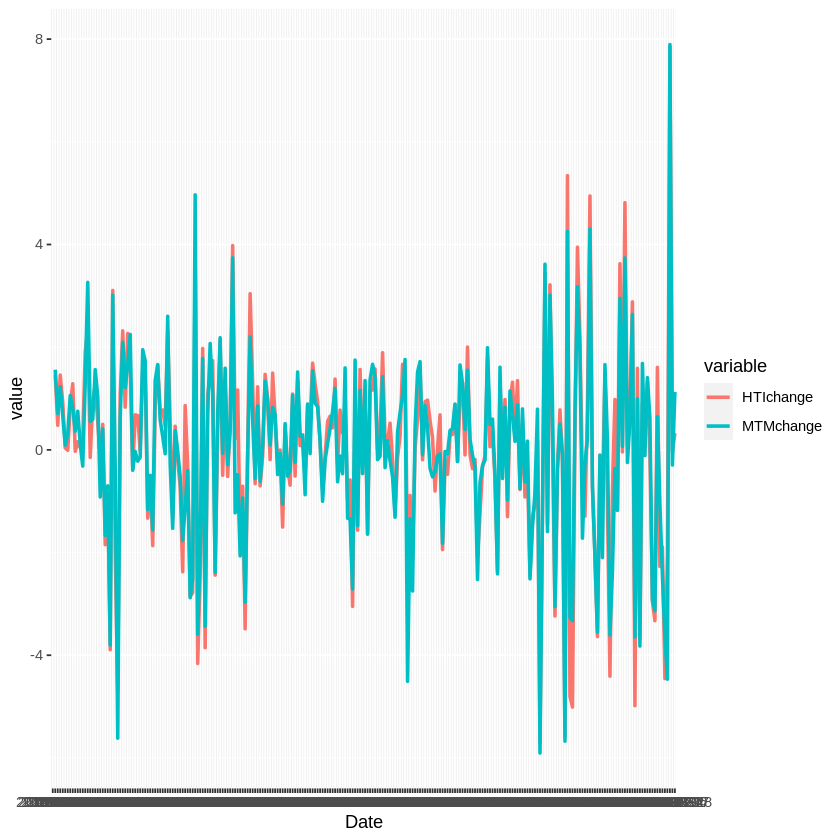

In [40]:
data.frame(Date=Market$Date,HTIchange= transmute(Market, HTIchange=((HTI-lag(HTI))/lag(HTI))*100),MTMchange = transmute(Market, MTMchange=((MTM-lag(MTM))/lag(MTM))*100)) %>%
reshape2::melt(id.vars="Date") %>%
ggplot(aes(x=Date, y=value, group=variable, color=variable)) + geom_line(size=1)

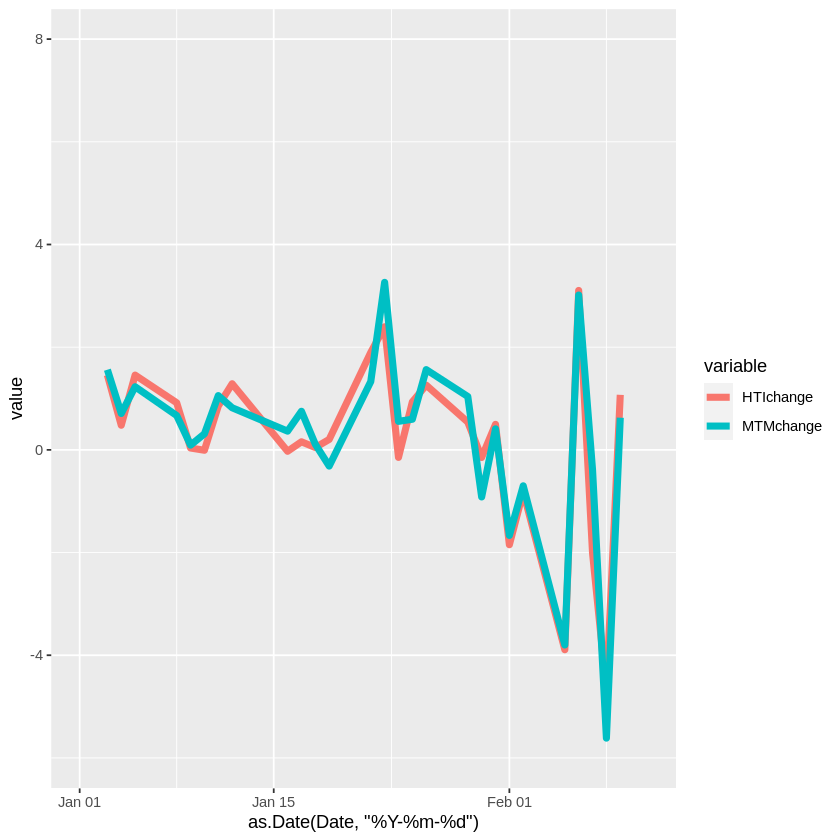

In [41]:
data.frame(Date=Market$Date, HTIchange= transmute(Market, HTIchange=((HTI-lag(HTI))/lag(HTI))*100), 
MTMchange = transmute(Market, MTMchange=((MTM-lag(MTM))/lag(MTM))*100)) %>%
reshape2::melt(id.vars="Date") %>%
ggplot(aes(x=as.Date(Date,"%Y-%m-%d"), y=value, group=variable, color=variable)) + geom_line(size=2) + scale_x_date(limit=c(as.Date("2018-01-01"),as.Date("2018-02-11")))

In [66]:
USDJPY = read.csv("data.csv")
head(USDJPY)

,Date,Open,High,Low,Close,Change.Pips.,Change...
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,03/11/2022 00:00,116.132,117.355,116.081,117.321,118.9,1.01
2,03/10/2022 00:00,115.797,116.192,115.797,116.128,33.1,0.29
3,03/09/2022 00:00,115.642,115.943,115.558,115.862,22.0,0.19
4,03/08/2022 00:00,115.284,115.792,115.257,115.673,38.9,0.34
5,03/07/2022 00:00,114.890,115.472,114.818,115.310,42.0,0.36
6,03/04/2022 00:00,115.457,115.554,114.648,114.851,-60.6,-0.53


In [67]:
nrow(USDJPY)
ncol(USDJPY)

[1] 100

[1] 7

In [79]:
JPYC = USDJPY[, c('Date', 'Close')]

JPYC = rename(JPYC, 'JPY_Close' = 'Close')


In [82]:
ALL = merge(Market, JPYC, by = 'Date')


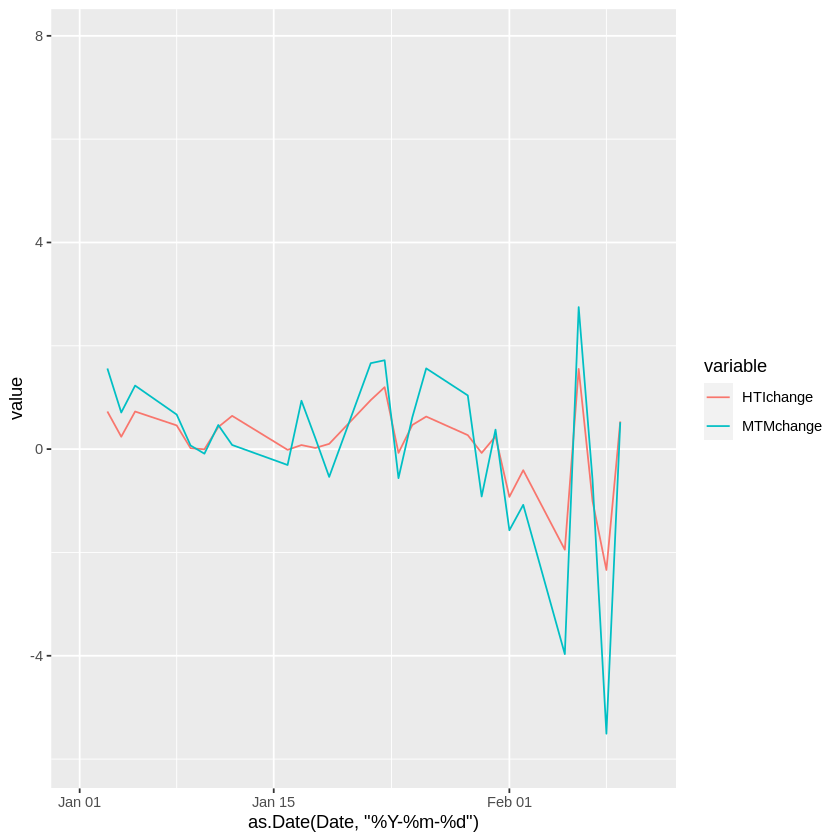

In [84]:
data.frame(Date=newStocks$Date, 
        MTMchange = transmute(newStocks, MTMchange=((MTM-lag(MTM))/lag(MTM))*100),
        MTMchange_JPY = transmute(newStocks, MTMchange_JPY=((MTM_JPY-lag(MTM_JPY))/lag(MTM_JPY))*100))%>%
reshape2::melt(id.vars="Date") %>%
ggplot(aes(x=as.Date(Date,"%Y-%m-%d") , y=value, group=variable, color=variable)) + geom_line(size=1) +
 scale_x_date(limit=c(as.Date("2018-01-01"),as.Date("2018-02-11")))

gap of 2 days - Strategy 1

In [88]:
Gap2 = Market[seq(1,nrow(Market),2),]
Gap2$Date = as.Date(Gap2$Date)
head(Gap2)

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose,remainingAmount,MTM,HTI
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,43.064999,41.135750,1189.01001,1189.01001,181.419998,181.419998,1065.00000,1065.00000,147.466537,⋯,201.070007,46.630001,43.507946,112.389999,105.914291,64.106003,64.106003,1172.700119,5000000.00,313.610755
3,2018-01-04,43.257500,41.319633,1209.58997,1209.58997,184.330002,184.330002,1086.40002,1086.40002,154.588913,⋯,205.630005,48.180000,44.954163,115.050003,108.421028,62.924000,62.924000,1000.074634,5115213.23,319.706041
5,2018-01-08,43.587502,41.634853,1246.87000,1246.87000,188.279999,188.279999,1106.93994,1106.93994,156.281067,⋯,212.050003,48.980000,45.700611,114.800003,108.185425,67.281998,67.281998,867.736680,5261034.67,327.335051
7,2018-01-10,43.572498,41.620529,1254.32996,1254.32996,187.839996,187.839996,1102.60999,1102.60999,156.959854,⋯,212.520004,48.799999,45.709969,112.870003,106.366638,66.959999,66.959999,1207.651005,5230929.56,327.428229
9,2018-01-12,44.272499,42.289158,1305.19995,1305.19995,179.369995,179.369995,1122.26001,1122.26001,155.965576,⋯,221.229996,49.509998,46.375004,110.129997,103.784508,67.244003,67.244003,346.114790,5215004.33,334.478202
11,2018-01-17,44.775002,42.769146,1295.00000,1295.00000,177.600006,177.600006,1131.97998,1131.97998,161.233276,⋯,217.500000,50.270000,47.086887,111.190002,104.783440,69.431999,69.431999,803.542283,5266811.26,334.912026


In [89]:
investedAmount = 5000000
options(digits=9)
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
startDate = mdy('01/02/2018')
beginDate = mdy('01/02/2018')
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

##Find Profit
while(startDate <= endDate){
	if(startDate == '2018-01-02'){
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp = floor(splitAmount/closeColn[i])
			totalSharesCount[i] =  temp[[i]] 
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
		}
		colnames(remainingAmount) = 'remainingAmount'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		colnames(MTM) = 'MTM'
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
    else if(startDate %in% Gap2$Date) {
		MTM = 0
		for(i in first) {
		closeColn = Market[Market$Date== startDate, first]
		MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		investedAmount = MTM + remainingAmount
		remainingAmount = investedAmount
		splitAmount = investedAmount/5
		colnames(investedAmount) = 'investedAmount'
		colnames(MTM) = 'MTM'
		stocksDiff_percent = list()
		for(i in totalStocks){
			init = Market[Market$Date == startDate, totalStocks]
			final = Market[Market$Date == beginDate, totalStocks]
			percentChange = 100 * ((init[i] - final[i])/ final[i])
			col = paste0(i, "_PC")
			stocksDiff_percent[col] = percentChange
        }
		stocksDiff_percent = stocksDiff_percent[order(unlist(stocksDiff_percent))]
		stocksDiff_percent = head(stocksDiff_percent,5)
		init_col_list = names(stocksDiff_percent)
		print(init_col_list)
		init_col_list = sub('_.*','',init_col_list)
		init_col_list = paste0(init_col_list,'_Close')
		first = init_col_list
		totalSharesCount = list()
		temp = list()
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount[,1]/closeColn[i])
			totalSharesCount[i] =  temp[[i]]
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
		}
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount       
    }
    else {
		MTM = 0
		for(i in first) {
		closeColn = Market[Market$Date== startDate, first]
		MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		colnames(MTM) = 'MTM'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
	startDate = startDate+1
}
fin = c('Gap2', MTM = tail(Market$MTM,1))
profit = c('Profit:', MTM-5000000)
fin
profit
tail(Market)

[1] "TSLA_AdjClose_PC"   "Apple_AdjClose_PC"  "MSFT_AdjClose_PC"  
[4] "FB_AdjClose_PC"     "Amazon_AdjClose_PC"
[1] "Apple_AdjClose_PC"  "SAP_AdjClose_PC"    "MSFT_AdjClose_PC"  
[4] "FB_AdjClose_PC"     "Google_AdjClose_PC"
[1] "SAP_AdjClose_PC"    "Apple_AdjClose_PC"  "MSFT_AdjClose_PC"  
[4] "Google_AdjClose_PC" "FB_AdjClose_PC"    
[1] "SAP_AdjClose_PC"   "FB_AdjClose_PC"    "Apple_AdjClose_PC"
[4] "MSFT_AdjClose_PC"  "TSLA_AdjClose_PC" 
[1] "FB_AdjClose_PC"     "SAP_AdjClose_PC"    "Apple_AdjClose_PC" 
[4] "MSFT_AdjClose_PC"   "Google_AdjClose_PC"
[1] "FB_AdjClose_PC"    "SAP_AdjClose_PC"   "Apple_AdjClose_PC"
[4] "MSFT_AdjClose_PC"  "IBM_AdjClose_PC"  
[1] "SAP_AdjClose_PC"   "Apple_AdjClose_PC" "FB_AdjClose_PC"   
[4] "MSFT_AdjClose_PC"  "IBM_AdjClose_PC"  
[1] "Apple_AdjClose_PC" "SAP_AdjClose_PC"   "FB_AdjClose_PC"   
[4] "TSLA_AdjClose_PC"  "IBM_AdjClose_PC"  
[1] "Apple_AdjClose_PC" "SAP_AdjClose_PC"   "FB_AdjClose_PC"   
[4] "IBM_AdjClose_PC"   "TSLA_AdjClose_PC" 
[1] "App

MTM 
          "Gap2" "5381884.107129"

[[1]]
[1] "Profit:"

$MTM
[1] 381884.107

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose,remainingAmount,MTM,HTI
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
245,2018-12-20,39.207500,38.013325,1460.82996,1460.82996,133.399994,133.399994,1009.409973,1009.409973,108.049713,⋯,260.579987,46.240002,43.837776,100.099998,95.776382,63.076000,63.076000,968.329279,5363876.71,332.240313
246,2018-12-21,37.682499,36.534775,1377.44995,1377.44995,124.949997,124.949997,979.539978,979.539978,106.061188,⋯,246.389999,44.000000,41.714149,96.139999,91.987419,63.953999,63.953999,968.329279,5159333.08,317.439761
247,2018-12-24,36.707500,35.589466,1343.95996,1343.95996,124.059998,124.059998,976.219971,976.219971,102.839386,⋯,233.880005,42.689999,40.472202,95.000000,90.896667,59.077999,59.077999,572.892619,5078738.71,310.856482
248,2018-12-26,39.292500,38.095737,1470.90002,1470.90002,134.179993,134.179993,1039.459961,1039.459961,106.491394,⋯,253.669998,44.590000,42.273499,98.379997,94.130669,65.218002,65.218002,572.892619,5370527.16,335.274187
249,2018-12-27,39.037498,37.848495,1461.64001,1461.64001,134.520004,134.520004,1043.880005,1043.880005,108.776291,⋯,255.570007,44.970001,42.633759,98.989998,94.714317,63.226002,63.226002,154.710233,5400514.46,335.178982
250,2018-12-28,39.057499,37.867889,1478.02002,1478.02002,133.199997,133.199997,1037.079956,1037.079956,108.059273,⋯,256.079987,44.820000,42.491543,99.199997,94.915260,66.774002,66.774002,154.710233,5381884.11,336.268073


Strategy 1 - days 15

In [90]:
Gap15 = Market[seq(1,nrow(Market),15),]
Gap15$Date = as.Date(Gap15$Date)
head(Gap15)

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose,remainingAmount,MTM,HTI
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,43.064999,41.135750,1189.01001,1189.01001,181.419998,181.419998,1065.00000,1065.00000,147.466537,⋯,201.070007,46.630001,43.507946,112.389999,105.914291,64.106003,64.106003,1172.700119,5000000.00,313.610755
16,2018-01-24,43.555000,41.603798,1357.51001,1357.51001,186.550003,186.550003,1164.23999,1164.23999,158.097519,⋯,261.299988,51.450001,48.192165,114.370003,107.780205,69.178001,69.178001,333.120790,5364788.23,349.807052
31,2018-02-14,41.842499,40.130974,1451.05005,1451.05005,179.520004,179.520004,1069.69995,1069.69995,147.954117,⋯,266.000000,49.450001,46.318810,105.129997,99.072594,64.461998,64.461998,1148.556733,5091545.06,346.591861
46,2018-03-08,44.235001,42.425613,1551.85999,1551.85999,182.339996,182.339996,1126.00000,1126.00000,149.340347,⋯,317.000000,52.130001,48.829102,108.339996,102.097641,65.820000,65.820000,354.476292,5312365.33,369.149533
61,2018-03-29,41.945000,40.229282,1447.33997,1447.33997,159.789993,159.789993,1031.79004,1031.79004,146.682602,⋯,295.350006,45.750000,42.853100,105.160004,99.100876,53.226002,53.226002,962.383282,4863584.90,341.830361
76,2018-04-20,41.430000,39.735348,1527.48999,1527.48999,166.279999,166.279999,1072.95996,1072.95996,138.527725,⋯,327.769989,46.230000,43.481987,106.000000,99.892471,58.048000,58.048000,195.951942,5045219.75,357.973566


In [91]:
investedAmount = 5000000
options(digits=9)
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
startDate = mdy('01/02/2018')
beginDate = mdy('01/02/2018')
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

##Find Profit
while(startDate <= endDate){
	if(startDate == '2018-01-02'){
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp = floor(splitAmount/closeColn[i])
			totalSharesCount[i] =  temp[[i]] 
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
		}
		colnames(remainingAmount) = 'remainingAmount'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		colnames(MTM) = 'MTM'
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
    else if(startDate %in% Gap15$Date) {
		MTM = 0
		for(i in first) {
		closeColn = Market[Market$Date== startDate, first]
		MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		investedAmount = MTM + remainingAmount
		remainingAmount = investedAmount
		splitAmount = investedAmount/5
		colnames(investedAmount) = 'investedAmount'
		colnames(MTM) = 'MTM'
		stocksDiff_percent = list()
		for(i in totalStocks){
			init = Market[Market$Date == startDate, totalStocks]
			final = Market[Market$Date == beginDate, totalStocks]
			percentChange = 100 * ((init[i] - final[i])/ final[i])
			col = paste0(i, "_PC")
			stocksDiff_percent[col] = percentChange
        }
		stocksDiff_percent = stocksDiff_percent[order(unlist(stocksDiff_percent))]
		stocksDiff_percent = head(stocksDiff_percent,5)
		init_col_list = names(stocksDiff_percent)
		print(init_col_list)
		init_col_list = sub('_.*','',init_col_list)
		init_col_list = paste0(init_col_list,'_Close')
		first = init_col_list
		totalSharesCount = list()
		temp = list()
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount[,1]/closeColn[i])
			totalSharesCount[i] =  temp[[i]]
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
		}
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount       
    }
    else {
		MTM = 0
		for(i in first) {
		closeColn = Market[Market$Date== startDate, first]
		MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		colnames(MTM) = 'MTM'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
	startDate = startDate+1
}
fin15 = c('Gap15', MTM = tail(Market$MTM,1))
profit15 = c('Profit:', MTM-5000000)
fin15
profit15
tail(Market)

[1] "Apple_AdjClose_PC" "SAP_AdjClose_PC"   "FB_AdjClose_PC"   
[4] "MSFT_AdjClose_PC"  "IBM_AdjClose_PC"  
[1] "SAP_AdjClose_PC"    "Apple_AdjClose_PC"  "FB_AdjClose_PC"    
[4] "Google_AdjClose_PC" "TSLA_AdjClose_PC"  
[1] "SAP_AdjClose_PC"   "FB_AdjClose_PC"    "IBM_AdjClose_PC"  
[4] "TSLA_AdjClose_PC"  "Apple_AdjClose_PC"
[1] "TSLA_AdjClose_PC"   "FB_AdjClose_PC"     "SAP_AdjClose_PC"   
[4] "Google_AdjClose_PC" "Apple_AdjClose_PC" 
[1] "TSLA_AdjClose_PC"  "FB_AdjClose_PC"    "SAP_AdjClose_PC"  
[4] "IBM_AdjClose_PC"   "Apple_AdjClose_PC"
[1] "TSLA_AdjClose_PC"   "IBM_AdjClose_PC"    "ORCL_AdjClose_PC"  
[4] "FB_AdjClose_PC"     "Google_AdjClose_PC"
[1] "TSLA_AdjClose_PC" "IBM_AdjClose_PC"  "ORCL_AdjClose_PC" "SAP_AdjClose_PC" 
[5] "FB_AdjClose_PC"  
[1] "IBM_AdjClose_PC"    "ORCL_AdjClose_PC"   "TSLA_AdjClose_PC"  
[4] "SAP_AdjClose_PC"    "Google_AdjClose_PC"
[1] "IBM_AdjClose_PC"   "TSLA_AdjClose_PC"  "ORCL_AdjClose_PC" 
[4] "SAP_AdjClose_PC"   "Apple_AdjClose_PC"
[1] "IBM_AdjC

MTM 
         "Gap15" "5218123.961019"

[[1]]
[1] "Profit:"

$MTM
[1] 218123.961

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose,remainingAmount,MTM,HTI
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
245,2018-12-20,39.207500,38.013325,1460.82996,1460.82996,133.399994,133.399994,1009.409973,1009.409973,108.049713,⋯,260.579987,46.240002,43.837776,100.099998,95.776382,63.076000,63.076000,1139.9932,5204294.46,332.240313
246,2018-12-21,37.682499,36.534775,1377.44995,1377.44995,124.949997,124.949997,979.539978,979.539978,106.061188,⋯,246.389999,44.000000,41.714149,96.139999,91.987419,63.953999,63.953999,1139.9932,5007344.20,317.439761
247,2018-12-24,36.707500,35.589466,1343.95996,1343.95996,124.059998,124.059998,976.219971,976.219971,102.839386,⋯,233.880005,42.689999,40.472202,95.000000,90.896667,59.077999,59.077999,1139.9932,4928525.18,310.856482
248,2018-12-26,39.292500,38.095737,1470.90002,1470.90002,134.179993,134.179993,1039.459961,1039.459961,106.491394,⋯,253.669998,44.590000,42.273499,98.379997,94.130669,65.218002,65.218002,1139.9932,5210461.16,335.274187
249,2018-12-27,39.037498,37.848495,1461.64001,1461.64001,134.520004,134.520004,1043.880005,1043.880005,108.776291,⋯,255.570007,44.970001,42.633759,98.989998,94.714317,63.226002,63.226002,1139.9932,5239239.55,335.178982
250,2018-12-28,39.057499,37.867889,1478.02002,1478.02002,133.199997,133.199997,1037.079956,1037.079956,108.059273,⋯,256.079987,44.820000,42.491543,99.199997,94.915260,66.774002,66.774002,1139.9932,5218123.96,336.268073


Strategy 2 -  gap 3

In [92]:
Gap3 = Market[seq(1,nrow(Market),3),]
Gap3$Date = as.Date(Gap3$Date)
head(Gap3)

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose,remainingAmount,MTM,HTI
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,43.064999,41.135750,1189.01001,1189.01001,181.419998,181.419998,1065.00000,1065.00000,147.466537,⋯,201.070007,46.630001,43.507946,112.389999,105.914291,64.106003,64.106003,1172.700119,5000000.00,313.610755
4,2018-01-05,43.750000,41.790077,1229.14001,1229.14001,186.850006,186.850006,1102.22998,1102.22998,155.344162,⋯,209.990005,48.470001,45.224754,116.330002,109.627274,63.316002,63.316002,1172.700119,5176906.95,324.361018
7,2018-01-10,43.572498,41.620529,1254.32996,1254.32996,187.839996,187.839996,1102.60999,1102.60999,156.959854,⋯,212.520004,48.799999,45.709969,112.870003,106.366638,66.959999,66.959999,1172.700119,5210556.37,327.428229
10,2018-01-16,44.047501,42.074242,1304.85999,1304.85999,178.389999,178.389999,1121.76001,1121.76001,156.644363,⋯,221.529999,49.590000,46.449944,110.680000,104.302818,68.012001,68.012001,1172.700119,5222953.11,334.386386
13,2018-01-19,44.615002,42.616325,1294.57996,1294.57996,181.289993,181.289993,1137.51001,1137.51001,155.229446,⋯,220.460007,50.580002,47.377258,113.199997,106.677612,70.003998,70.003998,1172.700119,5254667.45,335.746841
16,2018-01-24,43.555000,41.603798,1357.51001,1357.51001,186.550003,186.550003,1164.23999,1164.23999,158.097519,⋯,261.299988,51.450001,48.192165,114.370003,107.780205,69.178001,69.178001,173.393933,5403452.50,349.807052


In [93]:
investedAmount = 5000000
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
beginDate = mdy('01/02/2018')
startDate = beginDate
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

##Loss
while(startDate <= endDate){
    if(startDate == '2018-01-02'){
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount/closeColn[i])
			totalSharesCount[i] =  temp[[i]] 
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
        }
		colnames(remainingAmount) = 'remainingAmount'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		colnames(MTM) = 'MTM'
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
	}
    else if(startDate %in% Gap3$Date) {
		MTM = 0
        for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
        }
		investedAmount = MTM + remainingAmount
		remainingAmount = investedAmount
		splitAmount = investedAmount / 5
		colnames(investedAmount) = 'investedAmount'
		colnames(MTM) = 'MTM'
		stocksDiff_percent = list()
        for(i in totalStocks){
			init = Market[Market$Date== startDate, totalStocks]
			final = Market[Market$Date== beginDate, totalStocks]
			percentChange = 100 * ((init[i] - final[i])/ final[i])
			col = paste0(i, "_PC")
			stocksDiff_percent[col] = percentChange
        }
        stocksDiff_percent = stocksDiff_percent[order(unlist(stocksDiff_percent))]
        stocksDiff_percent = tail(stocksDiff_percent,5)
        init_col_list = names(stocksDiff_percent)
        init_col_list = sub('_.*','',init_col_list)
        init_col_list = paste0(init_col_list,'_Close')
        first = init_col_list
        totalSharesCount = list()
        temp = list()
        MTM = 0
        for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount[,1]/closeColn[i])
			totalSharesCount[i] =  temp[[i]]
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
        }
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
    }
    else {
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		colnames(MTM) = 'MTM'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
	startDate = startDate+1
}
fin7 = c('Gap3',MTM = tail(Market$MTM,1))
loss3 = c('Loss:', 5000000-MTM)
fin7
loss3

MTM 
          "Gap3" "4730663.754972"

[[1]]
[1] "Loss:"

$ORCL_Close
[1] 269336.245

In [94]:
Gap15 = Market[seq(1,nrow(Market),15),]
Gap15$Date = as.Date(Gap15$Date)
head(Gap15)

,Date,Apple_Close,Apple_AdjClose,Amazon_Close,Amazon_AdjClose,FB_Close,FB_AdjClose,Google_Close,Google_AdjClose,IBM_Close,⋯,NFLX_AdjClose,ORCL_Close,ORCL_AdjClose,SAP_Close,SAP_AdjClose,TSLA_Close,TSLA_AdjClose,remainingAmount,MTM,HTI
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,43.064999,41.135750,1189.01001,1189.01001,181.419998,181.419998,1065.00000,1065.00000,147.466537,⋯,201.070007,46.630001,43.507946,112.389999,105.914291,64.106003,64.106003,1172.700119,5000000.00,313.610755
16,2018-01-24,43.555000,41.603798,1357.51001,1357.51001,186.550003,186.550003,1164.23999,1164.23999,158.097519,⋯,261.299988,51.450001,48.192165,114.370003,107.780205,69.178001,69.178001,1675.371278,5603321.26,349.807052
31,2018-02-14,41.842499,40.130974,1451.05005,1451.05005,179.520004,179.520004,1069.69995,1069.69995,147.954117,⋯,266.000000,49.450001,46.318810,105.129997,99.072594,64.461998,64.461998,1361.592858,5512290.40,346.591861
46,2018-03-08,44.235001,42.425613,1551.85999,1551.85999,182.339996,182.339996,1126.00000,1126.00000,149.340347,⋯,317.000000,52.130001,48.829102,108.339996,102.097641,65.820000,65.820000,1254.482228,5882374.15,369.149533
61,2018-03-29,41.945000,40.229282,1447.33997,1447.33997,159.789993,159.789993,1031.79004,1031.79004,146.682602,⋯,295.350006,45.750000,42.853100,105.160004,99.100876,53.226002,53.226002,620.452979,5443876.80,341.830361
76,2018-04-20,41.430000,39.735348,1527.48999,1527.48999,166.279999,166.279999,1072.95996,1072.95996,138.527725,⋯,327.769989,46.230000,43.481987,106.000000,99.892471,58.048000,58.048000,1612.269659,5562637.79,357.973566


In [96]:
investedAmount = 5000000
remainingAmount = investedAmount
splitAmount = investedAmount/5
MTM = 0
beginDate = mdy('01/02/2018')
startDate = beginDate
endDate =  mdy('12/28/2018')
totalStocks = c('IBM_AdjClose','MSFT_AdjClose','Google_AdjClose','Apple_AdjClose','Amazon_AdjClose','FB_AdjClose','NFLX_AdjClose','TSLA_AdjClose','ORCL_AdjClose','SAP_AdjClose')
first = c('IBM_Close','MSFT_Close','Google_Close','Amazon_Close','FB_Close')
totalSharesCount = list()

##Loss
while(startDate <= endDate){
    if(startDate == '2018-01-02'){
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount/closeColn[i])
			totalSharesCount[i] =  temp[[i]] 
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
        }
		colnames(remainingAmount) = 'remainingAmount'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		colnames(MTM) = 'MTM'
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
	}
    else if(startDate %in% Gap15$Date) {
		MTM = 0
        for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
        }
		investedAmount = MTM + remainingAmount
		remainingAmount = investedAmount
		splitAmount = investedAmount / 5
		colnames(investedAmount) = 'investedAmount'
		colnames(MTM) = 'MTM'
		stocksDiff_percent = list()
        for(i in totalStocks){
			init = Market[Market$Date== startDate, totalStocks]
			final = Market[Market$Date== beginDate, totalStocks]
			percentChange = 100 * ((init[i] - final[i])/ final[i])
			col = paste0(i, "_PC")
			stocksDiff_percent[col] = percentChange
        }
        stocksDiff_percent = stocksDiff_percent[order(unlist(stocksDiff_percent))]
        stocksDiff_percent = tail(stocksDiff_percent,5)
        init_col_list = names(stocksDiff_percent)
        init_col_list = sub('_.*','',init_col_list)
        init_col_list = paste0(init_col_list,'_Close')
        first = init_col_list
        totalSharesCount = list()
        temp = list()
        MTM = 0
        for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			temp= floor(splitAmount[,1]/closeColn[i])
			totalSharesCount[i] =  temp[[i]]
			remainingAmount = remainingAmount - temp*closeColn[i]
			MTM = MTM + temp*closeColn[i]
        }
		MTM = MTM + remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
    }
    else {
		MTM = 0
		for(i in first) {
			closeColn = Market[Market$Date== startDate, first]
			MTM = MTM + totalSharesCount[[i]]*closeColn[i]
		}
		colnames(MTM) = 'MTM'
		Market[Market$Date == startDate,'remainingAmount'] = remainingAmount
		Market[Market$Date == startDate,'MTM'] = MTM
    }
	startDate = startDate+1
}
fin8 = c('Gap15',MTM = tail(Market$MTM,1))
loss4 = c('Loss:', 5000000-MTM)
fin8
loss4

MTM 
         "Gap15" "4704687.065767"

[[1]]
[1] "Loss:"

$MTM
[1] 295312.934